In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, classification_report

In [34]:
import os
os.getcwd()

'C:\\Users\\Phuc Pham\\Downloads'

In [35]:
file_path = r"water_potability.csv"

In [36]:
df = pd.read_csv(file_path)

In [37]:
sns.set_style("dark")
palette1 = sns.color_palette("coolwarm", n_colors = 10)
palette1.reverse()
#Add palette here if necessary

### Which water quality features (e.g., pH, hardness, chloramines) have the strongest impact on water potability?

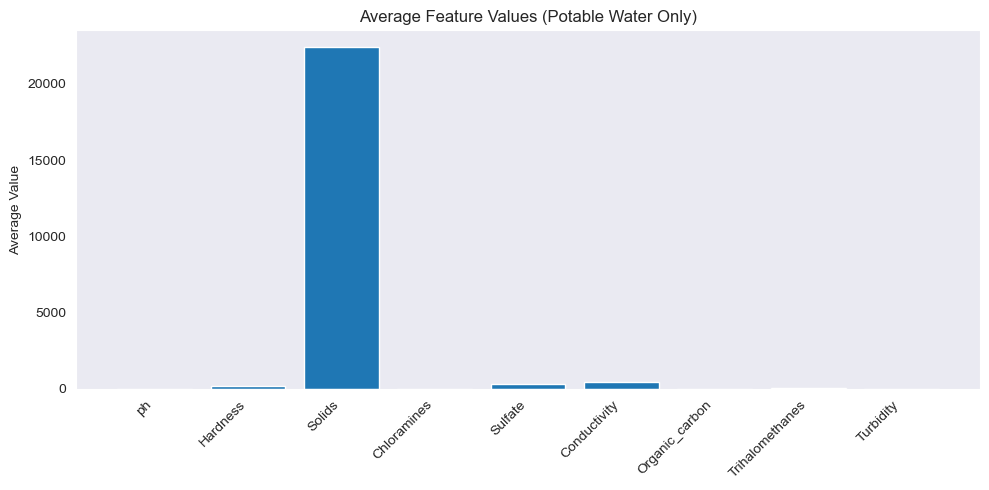

In [38]:
non_potable_df = df[df["Potability"] == 1]

# Calculate mean for each feature (excluding Potability)
feature_cols = [col for col in df.columns if col != "Potability"]
means = non_potable_df[feature_cols].mean()

plt.figure(figsize=(10,5))
plt.bar(means.index, means.values)
plt.ylabel("Average Value")
plt.title("Average Feature Values (Potable Water Only)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

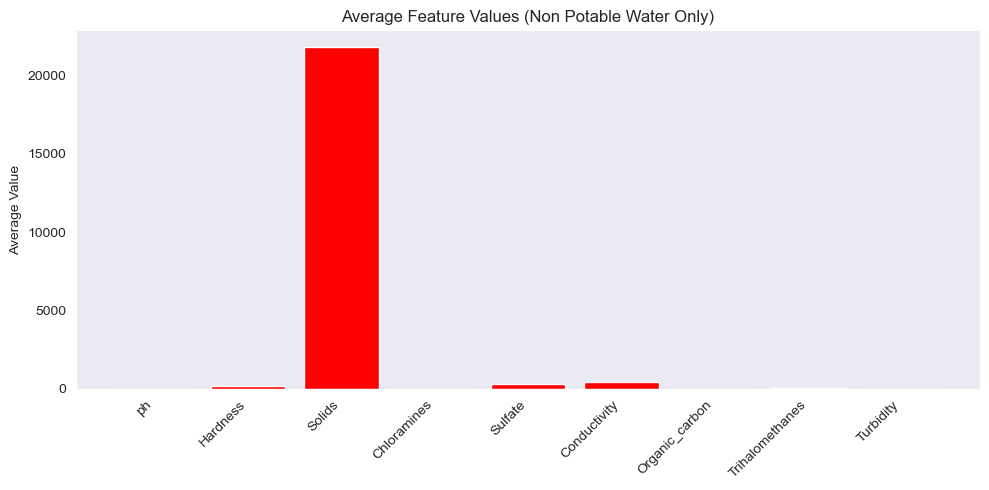

In [39]:
non_potable_df = df[df["Potability"] ==0]

# Calculate mean for each feature (excluding Potability)
feature_cols = [col for col in df.columns if col != "Potability"]
means = non_potable_df[feature_cols].mean()

plt.figure(figsize=(10,5))
plt.bar(means.index, means.values,color='r')
plt.ylabel("Average Value")
plt.title("Average Feature Values (Non Potable Water Only)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Using bar chart seem like show us there is no difference impact between all quality features

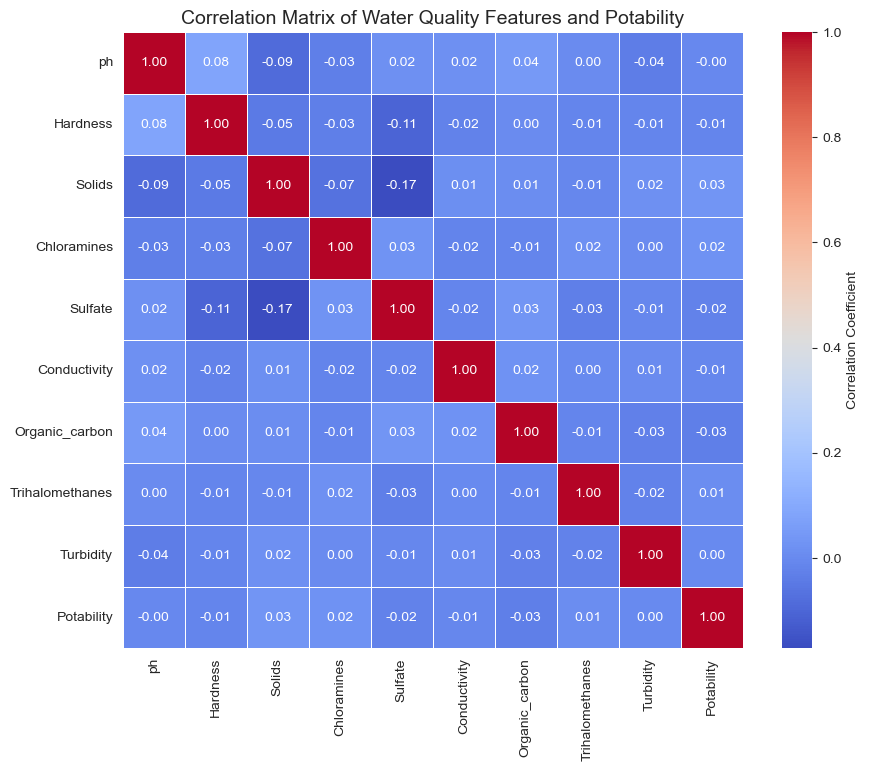

In [40]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# --- Create the Heatmap Visualization ---
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True, # Show correlation values on the map
            cmap='coolwarm', # Colormap for positive (red) and negative (blue) correlations
            fmt=".2f", # Format annotations to two decimal places
            linewidths=.5, # Lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})

plt.title('Correlation Matrix of Water Quality Features and Potability', fontsize=14)
plt.show()

#### From heatmap, the values are all near 0.00, this tells us that no single water quality feature has a strong linear relationship that clearly distinguishes potable water from non-potable water.

### Can we accurately predict whether a water sample is safe to drink based on its chemical properties?


## Linear Regression

In [50]:
# --- Data Cleaning (Impute missing values with the median) ---
df['ph'].fillna(df['ph'].median(), inplace=True)
df['Sulfate'].fillna(df['Sulfate'].median(), inplace=True)
df['Trihalomethanes'].fillna(df['Trihalomethanes'].median(), inplace=True)

# Define features (X) and target (y)
X = df.drop('Potability', axis=1)
y = df['Potability']
#Split data for test and train 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
coefficients = pd.Series(lin_reg.coef_, index=X.columns)
intercept = lin_reg.intercept_

print("\nCoefficients (Feature Weights):")
print(coefficients.sort_values(key=lambda x: np.abs(x), ascending=False).to_string())

#make prediction
y_pred = linear_model.predict(X_test)
#convert the predict to 1 or 0 
y_pred = (y_pred > 0.5).astype(int)

# Evaluate the model
linear_model_accuracy = accuracy_score(y_test, y_pred)
linear_model_report = classification_report(y_test, y_pred)

print("\n--- Linear Regression Evaluation ---")
print(f"Accuracy: {linear_model_accuracy:.4f}")
print("\nClassification Report:\n", linear_model_report)


Coefficients (Feature Weights):
Chloramines        0.008812
Organic_carbon    -0.002538
Turbidity          0.001874
ph                 0.000932
Trihalomethanes    0.000304
Sulfate            0.000090
Hardness           0.000071
Conductivity       0.000027
Solids             0.000002

--- Linear Regression Evaluation ---
Accuracy: 0.6104

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\Users\Phuc Pham\AppData\Local\Temp\ipykernel_21820\4013187269.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ph'].fillna(df['ph'].median(), inplace=True)
C:\Users\Phuc Pham\AppData\Local\Temp\ipykernel_21820\4013187269.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


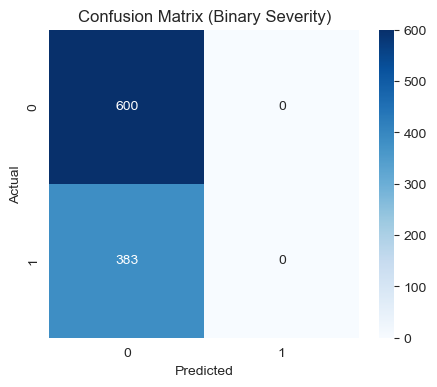

In [52]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Binary Severity)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [55]:
log_model = LogisticRegression(random_state=42, max_iter=1000)
log_model.fit(X_train, y_train)
# 2. Evaluation
# Make predictions
y_pred = log_model.predict(X_test)

# Evaluate the model
log_model_accuracy = accuracy_score(y_test, y_pred)
log_model_report = classification_report(y_test, y_pred)

print("\n--- Logistic Regression Evaluation ---")
print(f"Accuracy: {log_model_accuracy:.4f}")
print("\nClassification Report:\n", log_model_report)


--- Logistic Regression Evaluation ---
Accuracy: 0.6104

Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983



C:\Users\Phuc Pham\anaconda3-2\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Phuc Pham\anaconda3-2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Phuc Pham\anaconda3-2\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set t

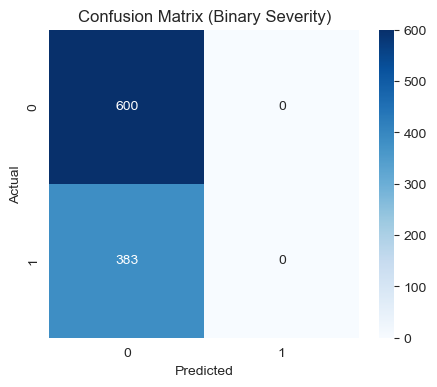

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Binary Severity)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### They both can only predict for 0 not 1. We could say linear regress and logistic regression is not good model to predict this data even the accuracy is 0.61

In [62]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced',
    max_depth=10 
)

rf_model.fit(X_train, y_train)

# Make predictions
y_pred= rf_model.predict(X_test)

print("--- Random Forest Model Evaluation (Balanced) ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# --- 4. Feature Importance ---

feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

print("\n--- Random Forest Feature Importances (Predictor Ranking) ---")
print(feature_importances.to_string())

--- Random Forest Model Evaluation (Balanced) ---
Accuracy: 0.6602

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.83      0.75       600
           1       0.60      0.40      0.48       383

    accuracy                           0.66       983
   macro avg       0.64      0.61      0.61       983
weighted avg       0.65      0.66      0.64       983


--- Random Forest Feature Importances (Predictor Ranking) ---
ph                 0.162613
Sulfate            0.156880
Hardness           0.117725
Chloramines        0.114455
Solids             0.112475
Conductivity       0.089502
Trihalomethanes    0.083988
Turbidity          0.083064
Organic_carbon     0.079297


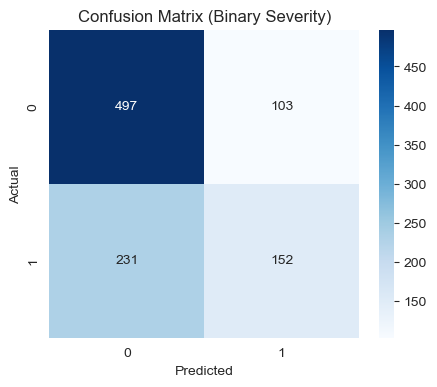

In [63]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Binary Severity)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### we can easily see that Random Forest is much better since It can predict both Potable and Non-Potable.